In [4]:
import sys
import numpy as np

import matplotlib.pyplot as plt

import cv2 as cv
from scipy import interpolate
from scipy.signal import convolve2d
from scipy.ndimage import percentile_filter
from sklearn.preprocessing import MinMaxScaler

sys.path.append("../scripts/")
from oct2l_v1 import OCT2Layer




oct2layer = OCT2Layer(step=1)

filepath = "../data/npy/ODD_079_OD.npy"  # test

oct_vol = oct2layer.load(filepath)
oct_cvol = oct2layer.preprocess(oct_vol)
ilm_surf = oct2layer.segment(oct_cvol)

partial_volume = oct2layer.search_grid(ilm_surf) 
conv_partial_volume = oct2layer.preprocess(partial_volume)
rpe = oct2layer.segment(conv_partial_volume)
rpe = oct2layer.correct(ilm_surf, rpe)





Preprocessing completed for ILM
Preprocessing completed for RPE
(97, 496, 768)
 >>>>>>>>>> 3/3: RPE Correction Complete <<<<<<<<<<< 


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

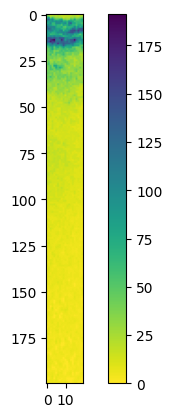

In [30]:
oct_vol_strip = oct2layer.get_volstrip(oct_vol, ilm_surf, height=200)
oct_cvol_strip = oct2layer.preprocess(oct_vol_strip)
# here/
rpe_surf = oct2layer.segment(oct_vol_strip)



In [27]:
box

array([[2.41185893e+01, 2.46006862e+01, 1.57799212e+01, ...,
        1.46860033e+01, 1.27022974e+01, 1.11751934e+01],
       [4.42257189e+01, 3.39716965e+01, 1.95439315e+01, ...,
        1.54325033e+01, 2.25537866e+01, 2.20580029e+01],
       [6.42877558e+01, 9.11988450e+01, 3.80994643e+01, ...,
        2.89851497e+01, 3.71819377e+01, 4.34264298e+01],
       ...,
       [2.57238988e+00, 3.20776526e-06, 5.04562204e+00, ...,
        5.82407057e+00, 3.46412230e+00, 1.29667943e+00],
       [3.93582485e+00, 2.46359833e+00, 6.07056536e+00, ...,
        3.89934086e+00, 1.91135360e+00, 3.20776526e-06],
       [3.55693736e+00, 3.76479262e+00, 4.53880098e+00, ...,
        2.13376696e+00, 1.59657841e+00, 1.09443261e+00]])

In [ ]:

import argsparse


filepath = args.filepath

oct2layer = OCT2Layer()


oct_vol = oct2layer.load(filepath)
oct_cvol = oct2layer.preprocess(oct_vol)


ilm_surf = oct2layer.segment(oct_cvol)

oct_vol_strip = oct2layer.get_volstrip(oct_vol, ilm_surf, height=200)
oct_cvol_strip = oct2layer.preprocess(oct_vol_strip)
rpe_surf = oct2layer.segment(oct_vol_strip)

In [36]:
this_k = ovol[k,:,:]
this_s = surf[k,:]
K = 97
M = 768

vol2 = np.zeros((K, 100, M))  # 100 rows. 


for k in range(K):
    for m in range(M):

        i0 = int(surf[k,m]) + 50  # starting index for the search
        
        ovol[k, i0:i0+100, :]

        
        
        vol2[k,:,:] = ovol[k, mi:mi+100, :]



plt.imshow(vol2[k,:,:])



ValueError: could not broadcast input array from shape (99,768) into shape (100,768)

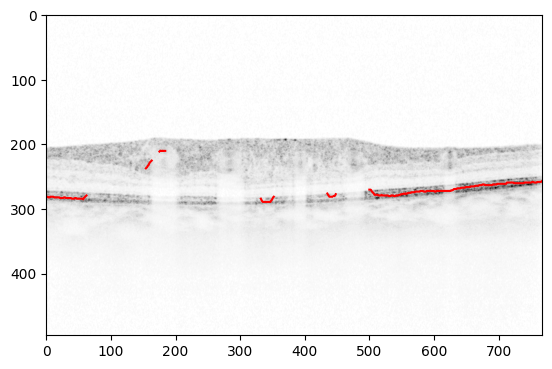

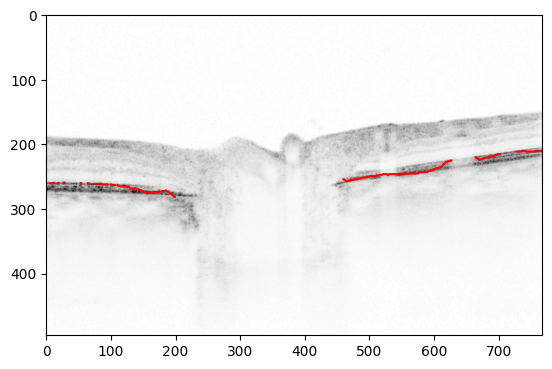

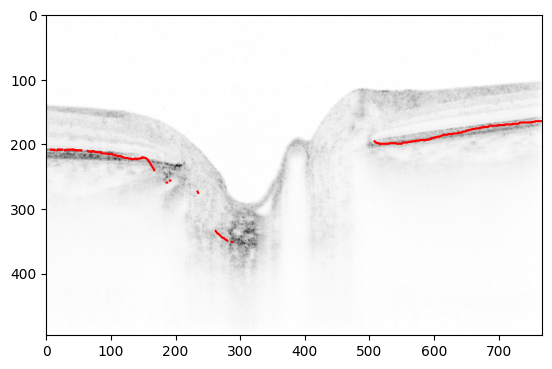

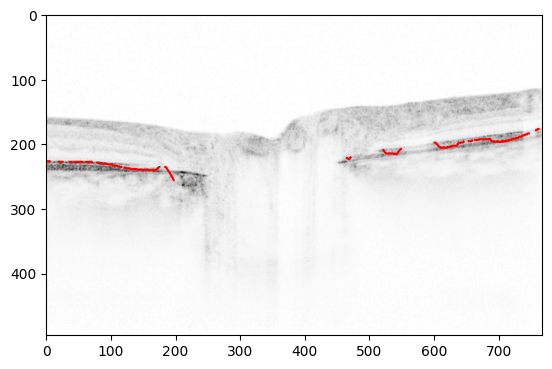

In [7]:
# check ilms

some_random_slices = [0,30, 42, 64]

for this_slice in some_random_slices:

    plt.figure()
    plt.imshow(oct_vol[this_slice,0:,:], cmap='binary')
    plt.plot(rpe[this_slice, :], color='r')
    rpe_surf


In [27]:
class Segment():

    def __init__(self, x, y):
        pass

    def ILM(self):
        print('this is ILM')
    
    def RPE(self):
        print('this is RPE')


segment = Segment(1,2)
segment.RPE()
segment.ILM()
    
class TestClass():

    def __init__(self, x, y):

        segment = Segment(1,2)

    
    



this is RPE
this is ILM


In [20]:
variance = np.diff(surf[k,:]) # difference between each point
threshold = np.percentile(abs(variance), 95)


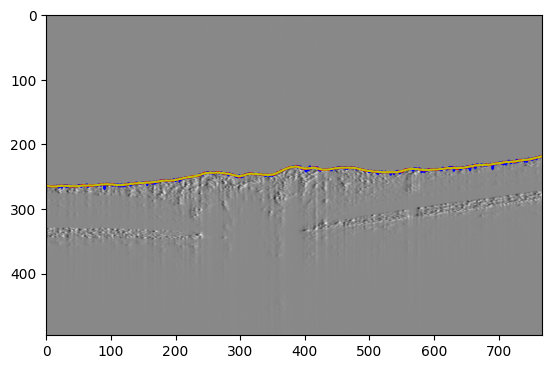

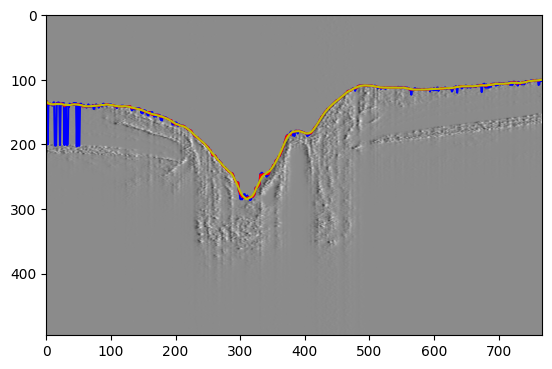

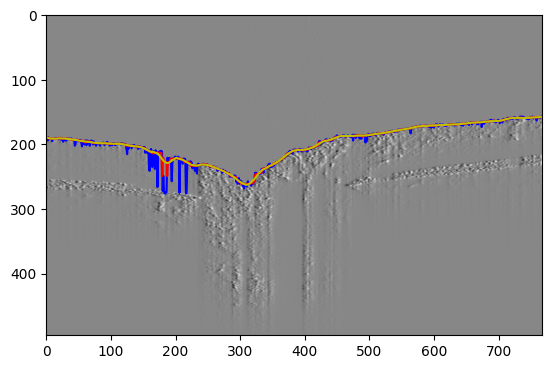

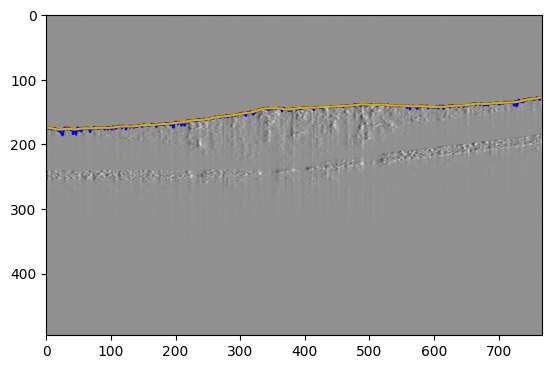

In [23]:
from scipy.signal import medfilt, savgol_filter

for k in [20,40,60,80]:

    s1 = surf[k,:]
    s2 = medfilt(s1, 15)
    s3 = savgol_filter(s2, 31, 3)

    plt.figure()
    plt.imshow(cvol[k,:,:], 'binary')
    plt.plot(s1, 'b')
    plt.plot(s2, 'r')
    plt.plot(s3, 'y')


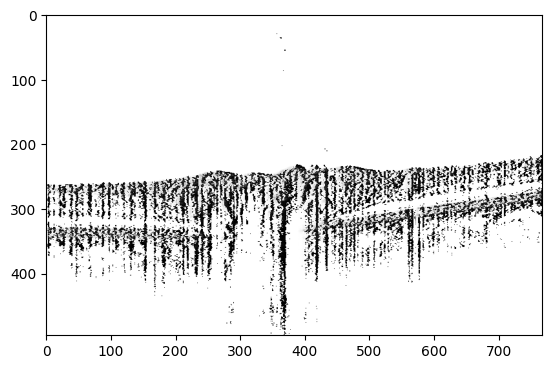

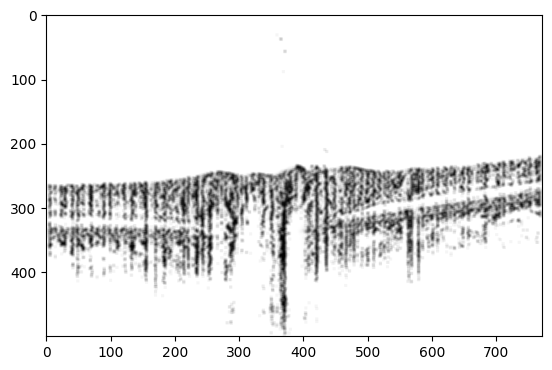

In [8]:
x = np.uint8(cvol)[20,:,:]
plt.imshow(x, "binary")

xg = convolve2d(x, (1/25)*np.ones((5,5)))

plt.figure()
plt.imshow(xg, "binary")

In [13]:
# real-world distance (microns) between each point along k,n,m dimensions
k_micron = 30
n_micron = 3.8
m_micron = 6

# vertical edge finding kernel 
kernel = np.array([
    [-1, 2, -1],
    [ 0, 0, 0],
    [ 1, 2, 1]])

vol = np.load("../data/npy/ODD_079_OD.npy")
K, M, N = vol.shape

surface = np.zeros((K, M))
stds = []